# Classification of EMVIC dataset

## Import packages

In [86]:
import pandas as pd
import sklearn
import numpy as np
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import matplotlib.pyplot as plt


In [1]:
import requests
r = requests.get("https://github.com/kasprowski/etra2021/emvic/emvic.data", allow_redirects=True)
open('emvic.data', 'wb').write(r.content)
print("Downloaded to emvic.data")

Downloaded to flowers.tgz


## Load data

In [102]:
trainData = pd.read_csv('emvic.data',sep='\t',header=None)
samples = np.array(trainData.values[:,4097:],dtype=float)
labels = trainData.values[:,0]
numLabels = len(set(labels))
print("Labels distribution:",Counter(labels))

print(samples.shape)
print(labels.shape)

Labels distribution: Counter({'a25': 105, 'a37': 63, 'a40': 52, 'a32': 50, 'a41': 39, 'a42': 38, 'a29': 36, 'a28': 33})
(416, 8192)
(416,)


## Create the model

In [103]:
model = Sequential()
model.add(Dense(150, input_dim=samples.shape[1], activation='sigmoid'))
model.add(Dense(150, activation='sigmoid'))
model.add(Dense(150, activation='sigmoid'))
model.add(Dense(150, activation='sigmoid'))
model.add(Dense(numLabels, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 150)               1228950   
_________________________________________________________________
dense_59 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_60 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_61 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_62 (Dense)             (None, 8)                 1208      
Total params: 1,298,108
Trainable params: 1,298,108
Non-trainable params: 0
_________________________________________________________________


In [104]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
ohlabels = lb.fit_transform(labels)
labels = ohlabels
print("Samples array:",samples.shape)
print("Labels array:",labels.shape)


Samples array: (416, 8192)
Labels array: (416, 8)


## Train-test split (with and without stratification) and model fit

In [105]:
# train-test split
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples, labels, random_state=30
    , stratify=labels
    )

## Train the model

In [106]:
#model = KNeighborsClassifier()
H = model.fit(trainSamples, trainLabels,epochs=100,validation_data=(testSamples,testLabels))    

Epoch 1/100
10/10 [==============================] - 0s 20ms/step - loss: 2.0426 - accuracy: 0.2500 - val_loss: 2.0224 - val_accuracy: 0.2500
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 2.0308 - accuracy: 0.2532 - val_loss: 1.9988 - val_accuracy: 0.2500
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 2.0314 - accuracy: 0.2532 - val_loss: 1.9959 - val_accuracy: 0.2500
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 2.0013 - accuracy: 0.2885 - val_loss: 1.9762 - val_accuracy: 0.2500
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 1.9698 - accuracy: 0.2532 - val_loss: 1.9603 - val_accuracy: 0.2500
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 1.9592 - accuracy: 0.2756 - val_loss: 1.9262 - val_accuracy: 0.3077
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 1.9160 - accuracy: 0.2917 - val_loss: 1.8686 - val_accuracy: 0.2692
Epoch 8/100


## Training history 

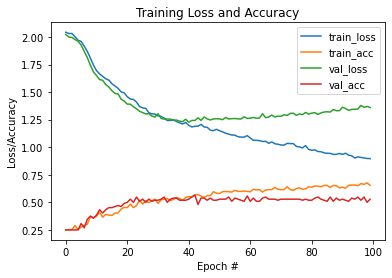

In [107]:
N = np.arange(0, 100)

plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


## Check error for the training set

In [108]:
trainResults = model.predict(trainSamples)

print(confusion_matrix(trainLabels.argmax(axis=1), trainResults.argmax(axis=1)))
print(classification_report(trainLabels.argmax(axis=1), trainResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(trainLabels.argmax(axis=1), trainResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(trainLabels.argmax(axis=1), trainResults.argmax(axis=1)))


[[74  0  1  2  0  0  0  2]
 [ 0 19  3  0  0  1  1  1]
 [ 0  2 21  1  1  0  0  2]
 [ 1  2  5 14  6  3  1  5]
 [ 0  3  3  4 32  0  0  5]
 [ 0  3  0  0  1 35  0  0]
 [ 1  2  1  2  7  0 11  5]
 [ 1  0  3  3 10  0  2 10]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        79
           1       0.61      0.76      0.68        25
           2       0.57      0.78      0.66        27
           3       0.54      0.38      0.44        37
           4       0.56      0.68      0.62        47
           5       0.90      0.90      0.90        39
           6       0.73      0.38      0.50        29
           7       0.33      0.34      0.34        29

    accuracy                           0.69       312
   macro avg       0.65      0.64      0.63       312
weighted avg       0.70      0.69      0.69       312

Cohen's Kappa: 0.639219465189111
Accuracy:  0.6923076923076923


## Check error for the test set

In [109]:
testResults = model.predict(testSamples)

print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
print("Accuracy: ",accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1)))


[[24  0  0  1  0  1  0  0]
 [ 0  4  2  0  2  0  0  0]
 [ 0  2  6  0  1  0  0  0]
 [ 1  2  1  3  3  1  1  1]
 [ 1  2  5  0  6  0  1  1]
 [ 2  0  0  0  1  9  0  1]
 [ 0  2  0  0  4  0  1  3]
 [ 0  1  1  2  3  0  0  2]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.31      0.50      0.38         8
           2       0.40      0.67      0.50         9
           3       0.50      0.23      0.32        13
           4       0.30      0.38      0.33        16
           5       0.82      0.69      0.75        13
           6       0.33      0.10      0.15        10
           7       0.25      0.22      0.24         9

    accuracy                           0.53       104
   macro avg       0.47      0.46      0.44       104
weighted avg       0.54      0.53      0.51       104

Cohen's Kappa: 0.44644796871605474
Accuracy:  0.5288461538461539
